In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/photos/Face Photos Dataset/Adil Kasim/smiling.jpg
/kaggle/input/photos/Face Photos Dataset/Adil Kasim/funny.jpg
/kaggle/input/photos/Face Photos Dataset/Adil Kasim/neutral.jpg
/kaggle/input/photos/Face Photos Dataset/Adil Kasim/mask.jpg
/kaggle/input/photos/Face Photos Dataset/Saatvik Vadlapatla/IMG_5606 Cropped.jpg
/kaggle/input/photos/Face Photos Dataset/Saatvik Vadlapatla/IMG_5608 Cropped.jpg
/kaggle/input/photos/Face Photos Dataset/Saatvik Vadlapatla/IMG_5607 Cropped.jpg
/kaggle/input/photos/Face Photos Dataset/Ishan Tripathi/Screen Shot 2022-02-22 at 10.05.25 PM.png
/kaggle/input/photos/Face Photos Dataset/Ishan Tripathi/Screen Shot 2022-02-22 at 10.05.14 PM.png
/kaggle/input/photos/Face Photos Dataset/Ishan Tripathi/Screen Shot 2022-02-22 at 10.05.37 PM.png
/kaggle/input/photos/Face Photos Dataset/Jiarui Li/Jiarui_Funny.jpg
/kaggle/input/photos/Face Photos Dataset/Jiarui Li/Jiarui_Normal.jpg
/kaggle/input/photos/Face Photos Dataset/Jiarui Li/Jiarui_Happy.jpg
/kaggle

In [2]:
!pip install gdown
!gdown --folder 1JAUozr5UF8RYdT8XiwV_WjA4Lp0hWhJ9 --remaining-ok
!pip install imagesize
!pip install pycocotools


  Installing build dependencies ... - \ | / done
  Getting requirements to build wheel ... - \ | / - done
  Preparing metadata (pyproject.toml) ... - \ | / - done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14775 sha256=1949f1951ad82fdb627611fd9b92e82f87ee8aa5d3775e7bb8c1c4b5849d4764
  Stored in directory: /root/.cache/pip/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown
Retrieving folder list
Retrieving folder 19zCo3LDpEcZWXshdZ43DErW7zRqn2mK7 Adil Kasim
Processing file 11MOVY8pN2eo8nV8Vv7I2egbdd9VUI9Av funny.jpg
Processing file 1qB3Jt2uj8kbeh2pGTI3fAvUuvFOsNYCy mask.jpg
Processing file 10Refd6jDETpQVHgDIsTSPa6KuZe1ZQVF neutral.jpg
Processing file 1BzudrJp_PP2y70HwKYIMjxNRRQmsUyIG smiling.jpg
Retrieving folder 14rYLkUQ8N9rsZd7Rto8lx-WFh5xWD53j Ananya Nagireddy
Processing file 1ZcBHn2RG7dph6kulSzwowT7g2VxgIOUi Funny.jpg
Processing file 1PQ-x8pKan2lh79XovzQfW03javUybYaV Neutral.jpg
Processin

In [3]:
!git clone https://github.com/facebookresearch/detr.git
import os
os.chdir('detr')
!git checkout 8a144f83a287f4d3fece4acdf073f387c5af387d


Cloning into 'detr'...
remote: Enumerating objects: 260, done.
remote: Total 260 (delta 0), reused 0 (delta 0), pack-reused 260
Receiving objects: 100% (260/260), 12.85 MiB | 29.23 MiB/s, done.
Resolving deltas: 100% (142/142), done.
Note: switching to '8a144f83a287f4d3fece4acdf073f387c5af387d'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 8a144f8 docs: add GH button in support of Ukraine (#490)


In [4]:


import argparse
import random
from pathlib import Path

import numpy as np
import torch
import torchvision.transforms as T
import matplotlib.pyplot as plt
import PIL.Image

from models import build_model

from main import get_args_parser

parser = argparse.ArgumentParser(description = 'DETR args parser', parents = [get_args_parser()])
args = parser.parse_args(args = [])
args.resume = '/kaggle/input/weights/checkpoint.pth'
args.device = 'cpu'
if args.output_dir:
  Path(args.output_dir).mkdir(parents = True,exist_ok = True)
args.distributed = False
print(args)


Namespace(aux_loss=True, backbone='resnet50', batch_size=2, bbox_loss_coef=5, clip_max_norm=0.1, coco_panoptic_path=None, coco_path=None, dataset_file='coco', dec_layers=6, device='cpu', dice_loss_coef=1, dilation=False, dim_feedforward=2048, dist_url='env://', distributed=False, dropout=0.1, enc_layers=6, eos_coef=0.1, epochs=300, eval=False, frozen_weights=None, giou_loss_coef=2, hidden_dim=256, lr=0.0001, lr_backbone=1e-05, lr_drop=200, mask_loss_coef=1, masks=False, nheads=8, num_queries=100, num_workers=2, output_dir='', position_embedding='sine', pre_norm=False, remove_difficult=False, resume='/kaggle/input/weights/checkpoint.pth', seed=42, set_cost_bbox=5, set_cost_class=1, set_cost_giou=2, start_epoch=0, weight_decay=0.0001, world_size=1)


In [5]:
modelx,criterion, postprocessors = build_model(args)
device = torch.device(args.device)
modelx.to(device)

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

DETR(
  (transformer): Transformer(
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=256, bias=True)
          (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
          (dropout1): Dropout(p=0.1, inplace=False)
          (dropout2): Dropout(p=0.1, inplace=False)
        )
        (1): TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
          )
          (linear1): Linear(in_features=256, out_f

In [6]:
output_dir = Path(args.output_dir)
if args.resume:
    checkpoint = torch.load(args.resume, map_location='cpu')
    modelx.load_state_dict(checkpoint['model'], strict=True)


In [7]:
# COCO Classes
CLASSES = [
   'N/A', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
   'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A',
   'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse',
   'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack',
   'umbrella', 'N/A', 'N/A', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis',
   'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove',
   'skateboard', 'surfboard', 'tennis racket', 'bottle', 'N/A', 'wine glass',
   'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich',
   'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake',
   'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table', 'N/A',
   'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard',
   'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A',
   'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier',
   'toothbrush'
]
# Colors for visualization
COLORS = [[0.000, 0.447, 0.741], [0.850, 0.325, 0.098], [0.929, 0.694, 0.125],
          [0.494, 0.184, 0.556], [0.466, 0.674, 0.188], [0.301, 0.745, 0.933]]

# Standard PyTorch mean-std input image normalization
transform = T.Compose([
    T.ToTensor(),
    T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# For output bounding box post-processing
def box_cxcywh_to_xyxy(x):
    x_c, y_c, w, h = x.unbind(1)
    b = [(x_c - 0.5 * w), (y_c - 0.5 * h),
         (x_c + 0.5 * w), (y_c + 0.5 * h)]
    return torch.stack(b, dim=1)

# Resize bounding boxes to be full size of the image
def rescale_bboxes(out_bbox, size):
    img_w, img_h = size
    b = box_cxcywh_to_xyxy(out_bbox)
    b = b * torch.tensor([img_w, img_h, img_w, img_h], dtype=torch.float32)
    return b

In [8]:
def detect(im,model,transform):
    img = transform(im).unsqueeze(0)
    assert img.shape[-2] <= 1600 and img.shape[-1] <= 1600, 'Demo model only supports images up to 1600 on each side.'
    outputs = model(img)
    probas = outputs['pred_logits'].softmax(-1)[0,:,:-1]
    keep = probas.max(-1).values > 0.7
    bboxes_scaled = rescale_bboxes(outputs['pred_boxes'][0,keep], im.size)
    return probas[keep],bboxes_scaled

In [9]:
def plot_results(pil_img, class_probs, b_boxes, classes, is_ground_truth=False):
    plt.figure(figsize=(16,10))
    plt.axis('off')
    ax = plt.gca()
    ax.imshow(pil_img)
    
    for p, (xmin, ymin, xmax, ymax), c in zip(class_probs, b_boxes, COLORS * 100):
        cl = p if is_ground_truth else p.argmax()
        
        # If the class isn't present, skip this annotation
        if CLASSES[cl] not in classes:
            continue
        # Plot bounding box and label (Note difference in bounding box format, xmax vs xmax-xmin)
        xmax = xmax if is_ground_truth else xmax-xmin
        ymax = ymax if is_ground_truth else ymax-ymin
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax, ymax, fill=False, color=c, linewidth=3))

        text = f"{CLASSES[cl]}" if is_ground_truth else f"{CLASSES[cl]}: {p[cl]:0.2f}"
        ax.text(xmin,ymin, text, fontsize=15, bbox=dict(facecolor="yellow", alpha=0.5))

    # Show the plot
    plt.show()


/opt/conda/lib/python3.7/site-packages/torch/_tensor.py:575: UserWarning: floor_divide is deprecated, and will be removed in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values.
To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor'). (Triggered internally at  /usr/local/src/pytorch/aten/src/ATen/native/BinaryOps.cpp:461.)
  return torch.floor_divide(self, other)


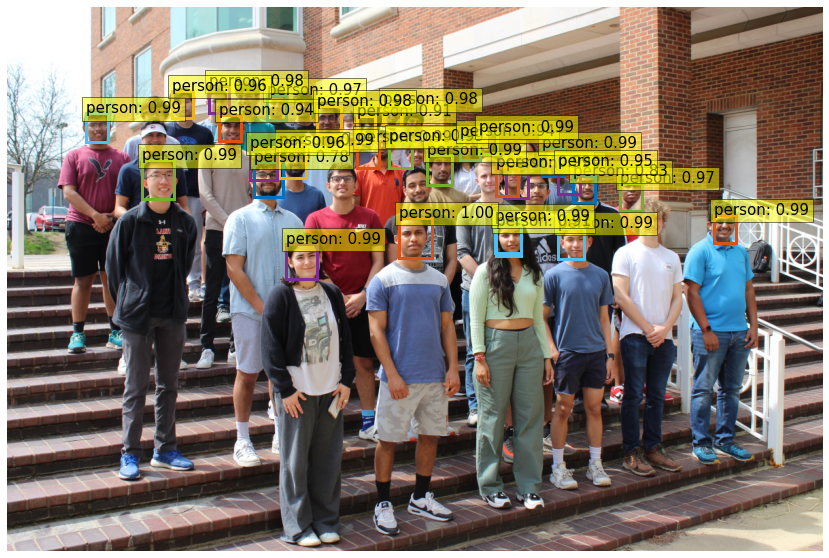

In [10]:
the_image = PIL.Image.open('/kaggle/input/2022-spring-coml-facial-recognition-competition/a.JPG').convert('RGB')
scores,boxes = detect(the_image,modelx,transform)
plot_classes = ['person']
plot_results(the_image,scores,boxes.tolist(),plot_classes)

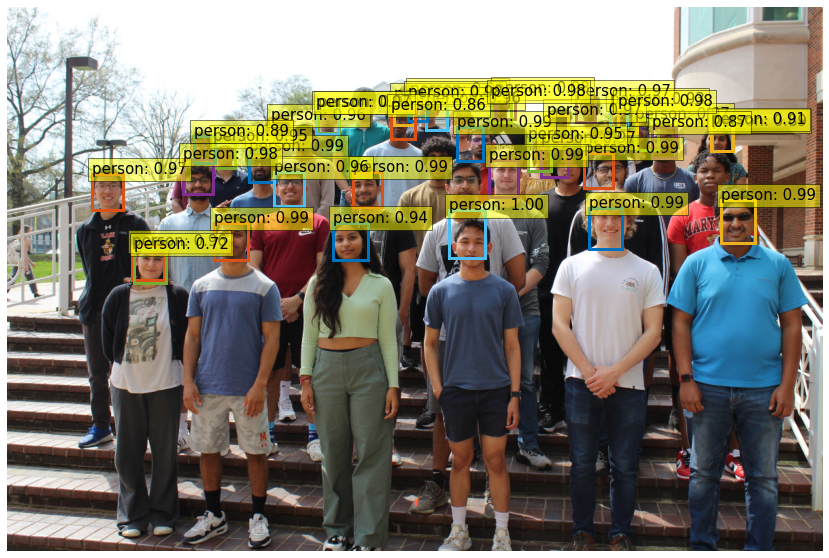

In [11]:
the_image = PIL.Image.open('/kaggle/input/2022-spring-coml-facial-recognition-competition/b.JPG').convert('RGB')
scores,boxes = detect(the_image,modelx,transform)
plot_classes = ['person']
plot_results(the_image,scores,boxes.tolist(),plot_classes)

In [12]:
!git clone https://github.com/krasserm/face-recognition.git
!mv face-recognition face_recognition


Cloning into 'face-recognition'...
remote: Enumerating objects: 173, done.
remote: Total 173 (delta 0), reused 0 (delta 0), pack-reused 173
Receiving objects: 100% (173/173), 16.84 MiB | 31.36 MiB/s, done.
Resolving deltas: 100% (29/29), done.


In [13]:
!pip install imagesize 

import requests
import tarfile
import os
import numpy as np
import cv2
import imgaug as ia
from imgaug import augmenters as iaa
from typing import List
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras, TensorSpec, dtypes
from tensorflow.data import Dataset, AUTOTUNE

import bz2
from face_recognition.align import AlignDlib

import matplotlib.patches as patches

from tensorflow.keras import backend as K
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras.layers import Input, Layer
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [14]:
landmarks_path = "/kaggle/input/models/landmarks.dat"

In [15]:
class TripletLossLayer(Layer):
    def __init__(self,alpha,**kwargs):
        self.alpha = alpha
        super(TripletLossLayer,self).__init__(**kwargs)

    def get_config(self):
        config = super().get_config().copy()
        config.update({
            'alpha': self.alpha,
        })
        return config
    def triplet_loss(self,inputs):
        a,p,n = inputs
        p_dist = K.sum(K.square(a-p),axis = -1)
        n_dist = K.sum(K.square(a-n),axis = -1)
        return K.sum(K.maximum(p_dist - n_dist + self.alpha,0),axis = 0)

    def call(self,inputs):
        loss = self.triplet_loss(inputs)
        self.add_loss(loss)
        return loss

In [16]:
# Input for anchor, positive, and negative images
in_a = Input(shape=(96, 96, 3), name="img_a")
in_p = Input(shape=(96, 96, 3), name="img_p")
in_n = Input(shape=(96, 96, 3), name="img_n")

# create the base model from EfficientNetB0
base_cnn = EfficientNetB0(input_shape=(96, 96, 3), include_top=False)

flatten = layers.Flatten()(base_cnn.output)
dense = layers.Dense(512, activation="relu")(flatten)
dense = layers.BatchNormalization()(dense)
output = layers.Dense(128)(dense)

embedding = Model(base_cnn.input, output, name="Embedding")
# Output the embedding vectors from anchor, positive, and negative images
# The model weights are shared (Triplet network)
emb_a = embedding(in_a)
emb_p = embedding(in_p)
emb_n = embedding(in_n)

# Layer that computes the triplet loss from anchor, positive and negative embedding vectors
triplet_loss_layer = TripletLossLayer(alpha=0.2, name='triplet_loss_layer')([emb_a, emb_p, emb_n])


2022-05-05 05:09:39.995558: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 05:09:39.996729: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 05:09:39.997457: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-05-05 05:09:39.998294: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

16719872/16705208 [==============================] - 0s 0us/step


In [17]:
model = Model([in_a,in_p,in_n], triplet_loss_layer)
model.compile(loss = None, optimizer = 'adam')
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
img_a (InputLayer)              [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
img_p (InputLayer)              [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
img_n (InputLayer)              [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
Embedding (Functional)          (None, 128)          10016035    img_a[0][0]                      
                                                                 img_p[0][0]                  

In [18]:
#model.load_weights('')

In [19]:
base_model = model.get_layer("Embedding")

In [20]:
def embedding_distance(embedding1, embedding2):
    return np.sum(np.square(embedding1-embedding2))

In [21]:
alignment = AlignDlib(landmarks_path) # create the face alignment model
augmenter = iaa.Sequential([ # create the image augmenter
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0,1.0)), # blur images with a sigma of 0 to 3.0
    iaa.GammaContrast((0.5, 2.0)), # adjust the image contrast
])

def preprocess_image(img_path = "", img_aug=True, face_align=True, alignment=alignment, augmenter=augmenter, target_shape=(96,96)):
    print(img_path)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    if face_align and (alignment is not None):
        bb = alignment.getLargestFaceBoundingBox(img) # get face bounding box
        if bb is not None:
            img = alignment.align(target_shape[0], img, bb,
                                  landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
            
    img = img.astype("float32") / 255.0

    if img_aug and (augmenter is not None):
        img = augmenter(images=[img])[0]

    img = cv2.resize(img, target_shape)
    img = np.expand_dims(img,axis = 0)

    return img
def plot_class_results(pil_img, class_probs, b_boxes,classes, is_ground_truth = False):
        plt.figure(figsize = (16,10))
        plt.axis('off')
        ax = plt.gca()
        ax.imshow(pil_img)
        
        for p, (xmin, ymin, xmax, ymax), c, cla in zip(class_probs, b_boxes, COLORS * 100, classes):
            cl = p if is_ground_truth else p.argmax()
            
            #Plot bounding boxes and labels
            xmax = xmax if is_ground_truth else xmax-xmin
            ymax = ymax if is_ground_truth else ymax-ymin
            ax.add_patch(plt.Rectangle((xmin, ymin), xmax, ymax, fill = False, color = c, linewidth = 3))
            
            text = f"{1}" if is_ground_truth else f"{cla}"
            ax.text(xmin, ymin, text, fontsize = 15, bbox = dict(facecolor = "yellow", alpha = 0.5))
            
            plt.show()
            
def save_img(pil_img, name, class_prob, b_boxes, classes, is_ground_truth = False):
    plt.figure(figsize =(16,10))
    plt.axis('off')
    ax = plt.gca() # gets the current axes instance of the current matching figure
    ax.imshow(pil_img)
    
    for y, (xmin, ymin, xmax, ymax), c, clas in zip(class_prob, b_boxes, COLORS * 100, classes):
        cla = y if is_ground_truth else y.argmax() # Returns max element of the array
        
        #Bounding boxes and labeling
        xmax = xmax if is_ground_truth else xmax-xmin
        ymax = ymax if is_ground_truth else ymax-ymin
        ax.add_patch(plt.Rectangle((xmin, ymin), xmax, ymax, fill = False, color = c, linewidth = 3))
        
        text = f"{1}" if is_ground_truth else f"{clas}"
        ax.text(xmin, ymin, text, fontsize = 15, bbox = dict(facecolor = "yellow", alpha = 0.5))
    plt.savefig(name)
    
def preloaded_preprocess(img, img_aug = True, face_align = True, alignment = alignment, augmenter = augmenter, target_shape = (96,96)):
    img = np.asarray(img)
    if face_align and (alignment is not None):
        bb = alignment.getLargestFaceBoundingBox(img)
        if bb is not None:
            img = alignment.align(target_shape[0], img, bb,
                                  landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)
            
    img = img.astype("float32") / 255.0

    img = cv2.resize(img, target_shape)
    img = np.expand_dims(img, axis = 0)
    return img

In [22]:
# Build dataset of COML images
COML_images = []
face_data_dir = '/kaggle/input/photos/Face Photos Dataset'
persons = os.listdir(face_data_dir)
img_exts = ('.png','.jpg','.jpeg')
# List of (person_name, image_filepath)
for i, person in enumerate(persons):
    person_path = os.path.join(face_data_dir, person)
    person_files = os.listdir(person_path)
    image_files = [(person, os.path.join(face_data_dir, person_path, image_file)) for image_file in person_files if image_file.endswith(img_exts)]
    COML_images.extend(image_files)
# Remove images that can't be loaded
COML_images = [(person, image_file) for (person, image_file) in COML_images if cv2.imread(image_file) is not None]
print(len(COML_images))    

115


In [23]:
embeddings = [(person, img, base_model.predict(preprocess_image(img))) for (person, img) in COML_images]


/kaggle/input/photos/Face Photos Dataset/Adil Kasim/smiling.jpg


2022-05-05 05:09:59.998360: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-05-05 05:10:02.184644: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


/kaggle/input/photos/Face Photos Dataset/Adil Kasim/funny.jpg
/kaggle/input/photos/Face Photos Dataset/Adil Kasim/neutral.jpg
/kaggle/input/photos/Face Photos Dataset/Adil Kasim/mask.jpg
/kaggle/input/photos/Face Photos Dataset/Saatvik Vadlapatla/IMG_5606 Cropped.jpg
/kaggle/input/photos/Face Photos Dataset/Saatvik Vadlapatla/IMG_5608 Cropped.jpg
/kaggle/input/photos/Face Photos Dataset/Saatvik Vadlapatla/IMG_5607 Cropped.jpg
/kaggle/input/photos/Face Photos Dataset/Ishan Tripathi/Screen Shot 2022-02-22 at 10.05.25 PM.png
/kaggle/input/photos/Face Photos Dataset/Ishan Tripathi/Screen Shot 2022-02-22 at 10.05.14 PM.png
/kaggle/input/photos/Face Photos Dataset/Ishan Tripathi/Screen Shot 2022-02-22 at 10.05.37 PM.png
/kaggle/input/photos/Face Photos Dataset/Jiarui Li/Jiarui_Funny.jpg
/kaggle/input/photos/Face Photos Dataset/Jiarui Li/Jiarui_Normal.jpg
/kaggle/input/photos/Face Photos Dataset/Jiarui Li/Jiarui_Happy.jpg
/kaggle/input/photos/Face Photos Dataset/Steven Zhang/photo3.jpg
/kaggl

In [24]:
# def plot_results(pil_img, boxes):
#     plt.figure(figsize=(16,10))
#     plt.axis('off')
#     ax = plt.gca()
#     ax.imshow(pil_img)
    
#     for person_id in boxes.keys():
#         person_name = name_lookup[person_id]
#         (xmin, ymin, xmax, ymax) = boxes[person_id][0]
#         xmax = xmax-xmin
#         ymax = ymax-ymin
#         ax.add_patch(plt.Rectangle((xmin, ymin), xmax, ymax, fill=False, color=[0.850, 0.325, 0.098], linewidth=3))

#         ax.text(xmin, ymin, person_name, fontsize=15, bbox=dict(facecolor="yellow", alpha=0.5))

#     # Show the plot
#     plt.show()


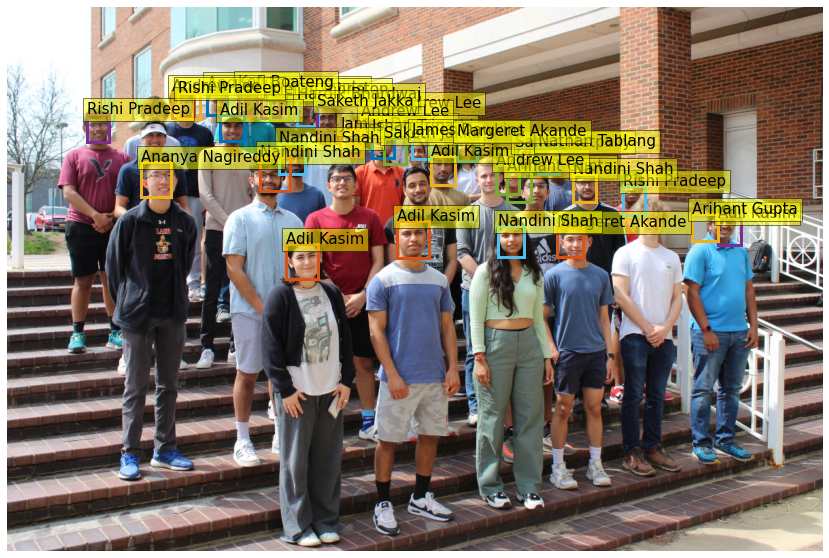

In [25]:
for i in os.listdir("/kaggle/input/2022-spring-coml-facial-recognition-competition"):
    if i == "a.JPG":
        group_photo = PIL.Image.open('/kaggle/input/2022-spring-coml-facial-recognition-competition/a.JPG').convert('RGB')
        scores, boxes = detect(group_photo, modelx, transform)
        cropped_faces = []
        for i in range(0, len(boxes)):
            box = boxes[i]
            xmin = box[0].item()
            xmax = box[2].item()
            ymin = box[1].item()
            ymax = box[3].item()
            y = group_photo.crop((xmin, ymin, xmax, ymax))
            cropped_faces.append([i, y, xmin, ymin, xmax, ymax])
            
        for cropped in cropped_faces:
            current_embedding = base_model.predict(preloaded_preprocess(cropped[1]))
            
            embedding_dist = [embedding_distance(current_embedding, embedding) for (person, img, embedding) in embeddings]
            shortest_dist = sorted(embedding_dist)
            index = embedding_dist.index(shortest_dist[0])
            (person, img, _) = embeddings[index]
            cropped[0] = person
        classes = []
        for z in cropped_faces:
            classes.append(str(z[0]))
        save_img(group_photo, '/kaggle/working/a.JPG', scores, boxes.tolist(), classes)

person_ids = pd.read_csv('/kaggle/input/2022-spring-coml-facial-recognition-competition/person_id_name_mapping.csv')
submission = pd.read_csv('/kaggle/input/2022-spring-coml-facial-recognition-competition/sample_submission.csv')

width, height = group_photo.size
for i in range(0, submission.shape[0]):
    if "a" in submission["id"][i]:
        id = submission["id"][i][1:]
        name = person_ids.iloc[int(id)-1][1]
        
        for row in cropped_faces:
            if row[0] == name:
                submission.at[i,"xmin"] = row[2] / width
                submission.at[i,"ymin"] = row[3] / height
                submission.at[i,"xmax"] = row[4] / width
                submission.at[i,"xmax"] = row[5] / height



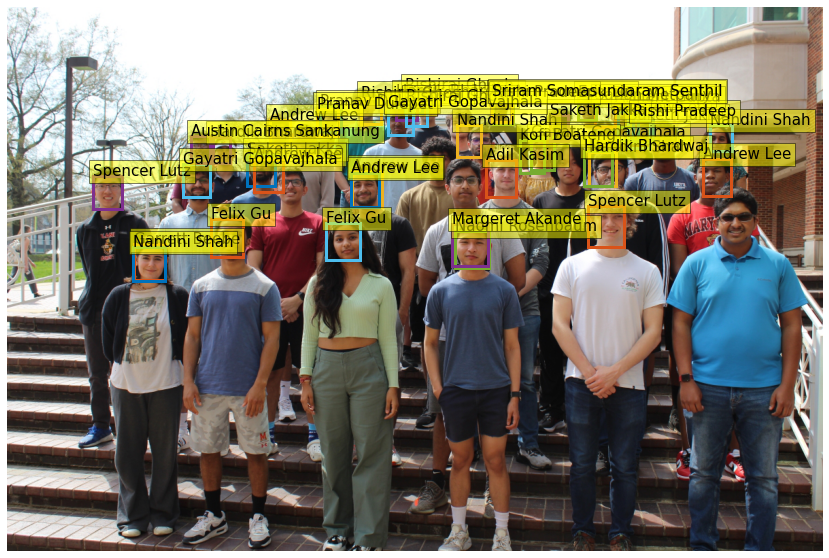

In [26]:
for i in os.listdir("/kaggle/input/2022-spring-coml-facial-recognition-competition"):
    if i == "b.JPG":
        group_photo = PIL.Image.open('/kaggle/input/2022-spring-coml-facial-recognition-competition/b.JPG').convert('RGB')
        scores, boxes = detect(group_photo, modelx, transform)
        cropped_faces = []
        for i in range(0, len(boxes)):
            box = boxes[i]
            xmin = box[0].item()
            xmax = box[2].item()
            ymin = box[1].item()
            ymax = box[3].item()
            y = group_photo.crop((xmin, ymin, xmax, ymax))
            cropped_faces.append([i, y, xmin, ymin, xmax, ymax])
            
        for cropped in cropped_faces:
            current_embedding = base_model.predict(preloaded_preprocess(cropped[1]))
            
            embedding_dist = [embedding_distance(current_embedding, embedding) for (person, img, embedding) in embeddings]
            shortest_dist = sorted(embedding_dist)
            index = embedding_dist.index(shortest_dist[0])
            (person, img, _) = embeddings[index]
            cropped[0] = person
        classes = []
        for z in cropped_faces:
            classes.append(str(z[0]))
        save_img(group_photo, '/kaggle/working/b.JPG', scores, boxes.tolist(), classes)
            
            
width, height = group_photo.size
for i in range(0, submission.shape[0]):
    if "a" in submission["id"][i]:
        id = submission["id"][i][1:]
        name = person_ids.iloc[int(id)-1][1]
        
        for row in cropped_faces:
            if row[0] == name:
                submission.at[i,"xmin"] = row[2] / width
                submission.at[i,"ymin"] = row[3] / height
                submission.at[i,"xmax"] = row[4] / width
                submission.at[i,"xmax"] = row[5] / height



In [27]:
submission.to_csv("/kaggle/working/submission.csv", index = False)